# **_1. Preprocessing of Dataset_**


---



##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 36***

---
Name: \\
***Rishabh Patil, Kaustubh Mahatme, Harshit Agarwal, Shivam Verma, Vaishnavi Shreshthi***

---
ID: \\
***2021A7PS0464H,2021A7PS0312H,2021A7PS0247H,2021A3PS0779H,2020AAPS2203H***


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Carbon Emissions.csv')
df_original=pd.read_csv('Carbon Emissions.csv')

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.isnull().sum()*100/df.shape[0]   #//checking the null values

Make                                0.0
Model                               0.0
Vehicle Class                       0.0
Engine Size(L)                      0.0
Cylinders                           0.0
Transmission                        0.0
Fuel Type                           0.0
Fuel Consumption City (L/100 km)    0.0
Fuel Consumption Hwy (L/100 km)     0.0
Fuel Consumption Comb (L/100 km)    0.0
Fuel Consumption Comb (mpg)         0.0
CO2 Emissions(g/km)                 0.0
dtype: float64

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
# Specify the names of the features you want to label encode
features_to_label_encode = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']  # Replace with the feature names

label_encoder = LabelEncoder()

for feature in features_to_label_encode:
    df[feature] = label_encoder.fit_transform(df[feature])


In [ ]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


To encode the CO2 emission to binary valueswe need some reference values to compare to. Following the regulations standards followed in the EU and the Canadian regulations we find that: \\
"Emissions of 100g/km or lower means you pay no tax. 150g/km is considered low. 160 to 255g/km is considered medium. Above 255g/km is considered high."

Hence the safe limit is set as 255(g/km). So to incentivise lower emissions we encode lower emissions as 1 and higher ones as 0. (1-> passed the test for emissions).

In [ ]:
new_column_name = 'BestModel'
new_column_data = []

for index, row in df.iterrows():
    existing_feature_value = row['CO2 Emissions(g/km)']

    # Defining condition for inserting values into the new column
    if existing_feature_value <= 255:                                 #bestcolumn condition
        new_value = 1
    else:
        new_value = 0

    new_column_data.append(new_value)

# Adding the new column to the DataFrame
df[new_column_name] = new_column_data

Here our outcome variable is `BestModel`

In [ ]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),BestModel
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196,1
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221,1
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136,1
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255,1
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244,1


In [ ]:
X = df.drop(columns=['BestModel'])
Y = df['BestModel']
print(X)
print(Y)

      Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0        0   1057              0             2.0          4            14   
1        0   1057              0             2.4          4            25   
2        0   1058              0             1.5          4            22   
3        0   1233             11             3.5          6            15   
4        0   1499             11             3.5          6            15   
...    ...    ...            ...             ...        ...           ...   
7380    41   1951             11             2.0          4            17   
7381    41   1957             11             2.0          4            17   
7382    41   1960             11             2.0          4            17   
7383    41   1968             12             2.0          4            17   
7384    41   1969             12             2.0          4            17   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0             4       

Normalizing our data:

In [ ]:
columns_to_normalize = X.columns

# normalizing each column using min_max technique
for column in columns_to_normalize:
    min_value = X[column].min()
    max_value = X[column].max()                                           #normalizing the data
    X[column] = (X[column] - min_value) / (max_value - min_value)

print(X)
print(Y)

      Make     Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0      0.0  0.515107       0.000000        0.146667   0.076923      0.538462   
1      0.0  0.515107       0.000000        0.200000   0.076923      0.961538   
2      0.0  0.515595       0.000000        0.080000   0.076923      0.846154   
3      0.0  0.600877       0.733333        0.346667   0.230769      0.576923   
4      0.0  0.730507       0.733333        0.346667   0.230769      0.576923   
...    ...       ...            ...             ...        ...           ...   
7380   1.0  0.950780       0.733333        0.146667   0.076923      0.653846   
7381   1.0  0.953704       0.733333        0.146667   0.076923      0.653846   
7382   1.0  0.955166       0.733333        0.146667   0.076923      0.653846   
7383   1.0  0.959064       0.800000        0.146667   0.076923      0.653846   
7384   1.0  0.959552       0.800000        0.146667   0.076923      0.653846   

      Fuel Type  Fuel Consumption City 

In [ ]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Seting the threshold for correlation
correlation_threshold = 0.85          # You can adjust this threshold based on your requirements...  this is for selecting the features
                                      #this is for selecting the features

# Finding highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Droping highly correlated features
df_selected_features = df.drop(columns=highly_correlated_features)

print("Selected Features:")
print(df_selected_features.columns)


Selected Features:
Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)', 'BestModel'],
      dtype='object')


From our analysis of features through correlation matrix, we found the above features to be significant to our outcome.

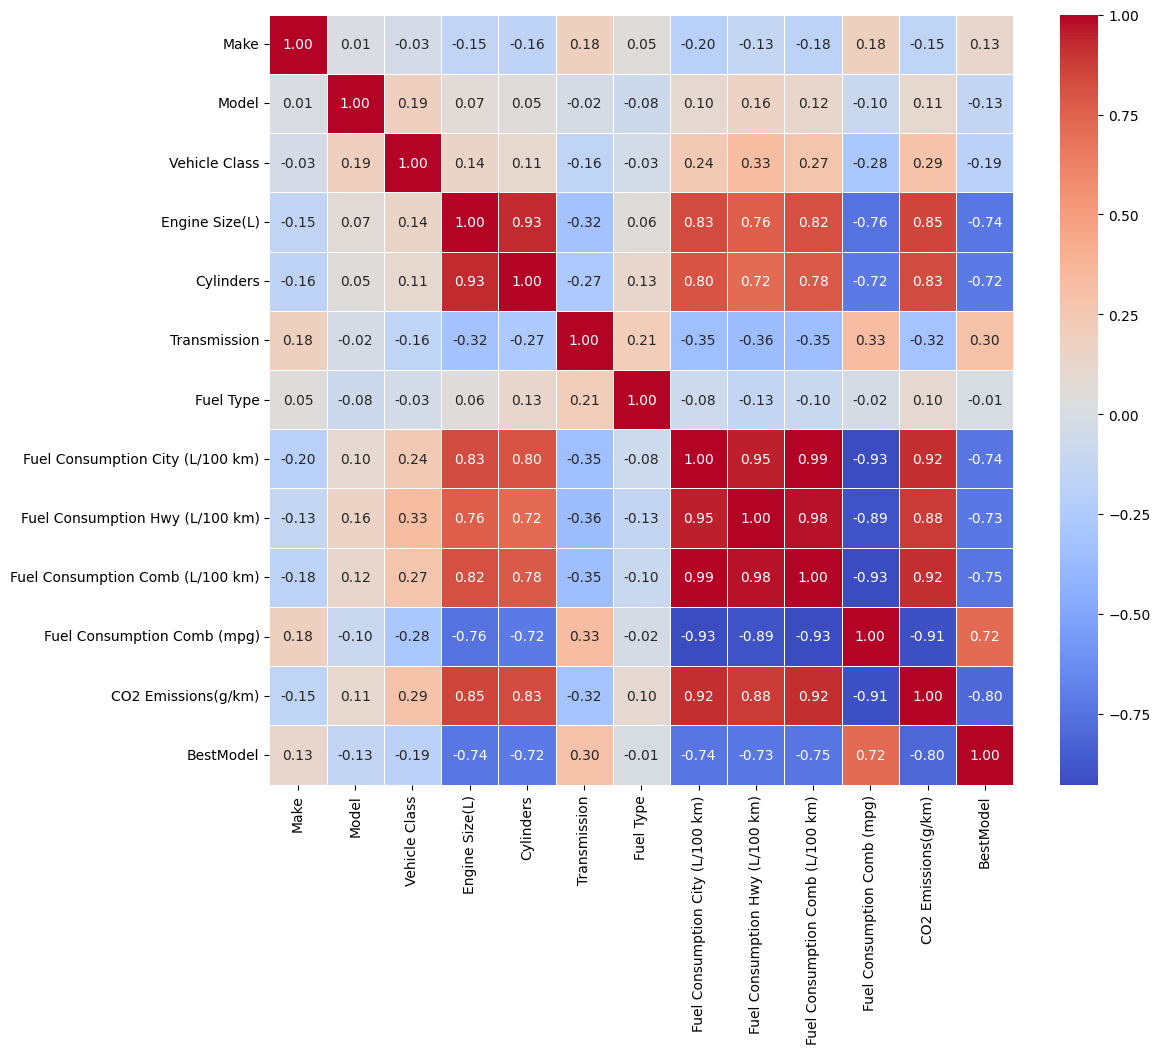

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.show()
#identify the influence of different variables on the emission of CO2

'Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Transmission',
       'Fuel Type', 'Fuel Consumption City (L/100 km)', 'BestModel'],
      dtype='object

From the above Correlation Matrix we infer that Co2 Emissions are heavily dependent on the following features:


*   Engine Size(L)
*   Cylinders
*   Fuel Consumptions City (L/100 km)
*   Fuel Consumptions Hwy (L/100 km)
*   Fuel Consumptions Comb (L/100 km)



In [ ]:
df_selected_features.head()

,Make,Model,Vehicle Class,Engine Size(L),Transmission,Fuel Type,Fuel Consumption City (L/100 km),BestModel
0,0,1057,0,2.0,14,4,9.9,1
1,0,1057,0,2.4,25,4,11.2,1
2,0,1058,0,1.5,22,4,6.0,1
3,0,1233,11,3.5,15,4,12.7,1
4,0,1499,11,3.5,15,4,12.1,1


In [ ]:
X = df_selected_features.drop(columns=['BestModel'])
Y = df_selected_features['BestModel']
print(X)
print(Y)

      Make  Model  Vehicle Class  Engine Size(L)  Transmission  Fuel Type  \
0        0   1057              0             2.0            14          4   
1        0   1057              0             2.4            25          4   
2        0   1058              0             1.5            22          4   
3        0   1233             11             3.5            15          4   
4        0   1499             11             3.5            15          4   
...    ...    ...            ...             ...           ...        ...   
7380    41   1951             11             2.0            17          4   
7381    41   1957             11             2.0            17          4   
7382    41   1960             11             2.0            17          4   
7383    41   1968             12             2.0            17          4   
7384    41   1969             12             2.0            17          4   

      Fuel Consumption City (L/100 km)  
0                                 

In [ ]:
columns_to_normalize = X.columns
                                                                        #normalizing the data using min-max
# normalize each column using min_max technique
for column in columns_to_normalize:
    min_value = X[column].min()
    max_value = X[column].max()
    X[column] = (X[column] - min_value) / (max_value - min_value)

print(X)
print(Y)

      Make     Model  Vehicle Class  Engine Size(L)  Transmission  Fuel Type  \
0      0.0  0.515107       0.000000        0.146667      0.538462        1.0   
1      0.0  0.515107       0.000000        0.200000      0.961538        1.0   
2      0.0  0.515595       0.000000        0.080000      0.846154        1.0   
3      0.0  0.600877       0.733333        0.346667      0.576923        1.0   
4      0.0  0.730507       0.733333        0.346667      0.576923        1.0   
...    ...       ...            ...             ...           ...        ...   
7380   1.0  0.950780       0.733333        0.146667      0.653846        1.0   
7381   1.0  0.953704       0.733333        0.146667      0.653846        1.0   
7382   1.0  0.955166       0.733333        0.146667      0.653846        1.0   
7383   1.0  0.959064       0.800000        0.146667      0.653846        1.0   
7384   1.0  0.959552       0.800000        0.146667      0.653846        1.0   

      Fuel Consumption City (L/100 km) 

Now we'll start training our model.\\
We need to split the data into train and test for the same.

In [ ]:
#spliting the training data and testing data
split_ratio = 0.8
split_index = int(split_ratio * len(X))                             #splitting the data
x_train, x_test = X[:split_index], X[split_index:]
y_train, y_test = Y[:split_index], Y[split_index:]

print(x_train.shape)
print(x_test.shape)

(5908, 7)
(1477, 7)


# ***2.Perceptron***

##Theorotical explanation:

The perceptron is a simple binary classification algorithm. \\ The basic equation for the working of perceptron is as follows:

The perceptron computes the weighted sum of its input features:\\
$$
z=\sum_{i=1}^n\left(w_i \cdot x_i\right)+b
$$

The activation function

$$
f(z)=\left\{\begin{array}{lc}
1, & \text { if } z>0.5 \\
0, & \text { otherwise }
\end{array}\right.
$$

During the training phase, the perceptron is presented with input samples, and the weights are adjusted based on the error in its predictions.

The update rule for each weight is given by:  \\
$$
w_{i(new)} = w_{i(old)} + \alpha (y-\hat y )x_i
$$



$$
b_{new} = b_{old} + \alpha (y-\hat y )x_i
$$

## Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1500):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.losses = []                        # To store training loss at each epoch
        self.accuracies = []                    # To store training accuracy at each epoch

    def initialize_weights(self, num_features):
        self.weights = np.zeros(num_features)   # Intitialises the weight to 0
        self.bias = 0                           # Intitialises the bias to 0

    def activate(self, z):                      # Activation Function
        return 1 if z > 0.5 else 0

    def predict(self, X):                      # Caluculates prediction
        z = np.dot(X, self.weights) + self.bias
        return self.activate(z)

    def _update_weights(self, X, y):            #Update the weigths and bias
        prediction = self.predict(X)
        update = self.learning_rate * (y - prediction)
        self.weights += update * X
        self.bias += update

    def train(self, X, y):
        num_samples, num_features = X.shape
        self.initialize_weights(num_features)

        for epoch in range(self.epochs):
            for i in range(num_samples):
                self._update_weights(X[i], y[i])

            # Compute training loss and accuracy at each epoch
            predictions = [self.predict(sample) for sample in X]
            loss = np.mean(np.abs(predictions - y))
            accuracy = np.mean(predictions == y)

            # Store loss and accuracy
            self.losses.append(loss)
            self.accuracies.append(accuracy)

    def evaluate(self, X, y):
        predictions = [self.predict(sample) for sample in X]
        accuracy = np.mean(predictions == y)
        return accuracy

    def confusion_matrix(self, X, y):
        # Initialize variables to count true positives, true negatives, false positives, and false negatives
        tp = tn = fp = fn = 0

        # Iterating through the samples
        for i in range(len(X)):
            prediction = self.predict(X[i])
            actual = y[i]

            # Updating confusion matrix counts
            if actual == 1 and prediction == 1:
                tp += 1
            elif actual == 0 and prediction == 0:
                tn += 1
            elif actual == 0 and prediction == 1:
                fp += 1
            elif actual == 1 and prediction == 0:
                fn += 1

        return np.array([[tn, fp], [fn, tp]])

In [ ]:
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

# Initializing and training the Perceptron model
perceptron_model = Perceptron(learning_rate=0.01, epochs=1500)
perceptron_model.train(x_train_np, y_train_np)

# Calculating accuracies on training and testing set
accuracy_train = perceptron_model.evaluate(x_train_np, y_train_np)
accuracy_test = perceptron_model.evaluate(x_test_np, y_test_np)

print(f"Model Accuracy on Train Set: {accuracy_train}*100")
print(f"Model Accuracy on Test Set: {accuracy_test}*100")

Model Accuracy on Train Set: 0.8860866621530129*100
Model Accuracy on Test Set: 0.8991198375084631*100


## Analysis

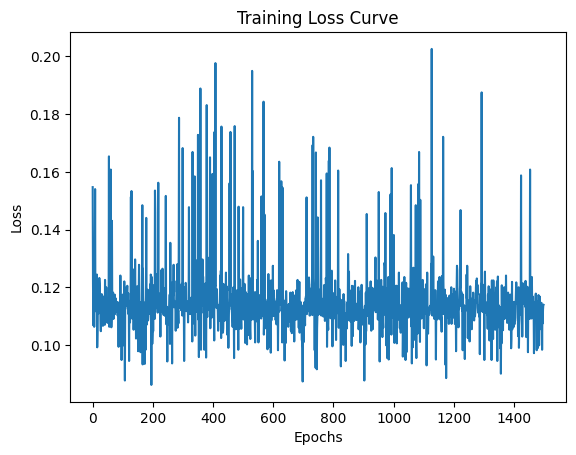

In [ ]:
# Ploting the training loss curve
plt.plot(perceptron_model.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

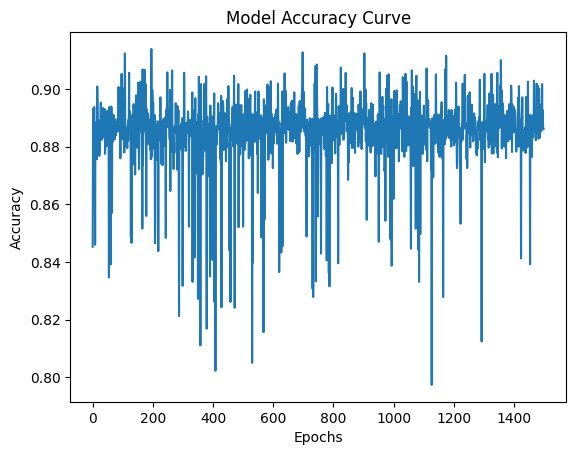

In [ ]:
# Ploting the model accuracy curve
plt.plot(perceptron_model.accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Curve')
plt.show()

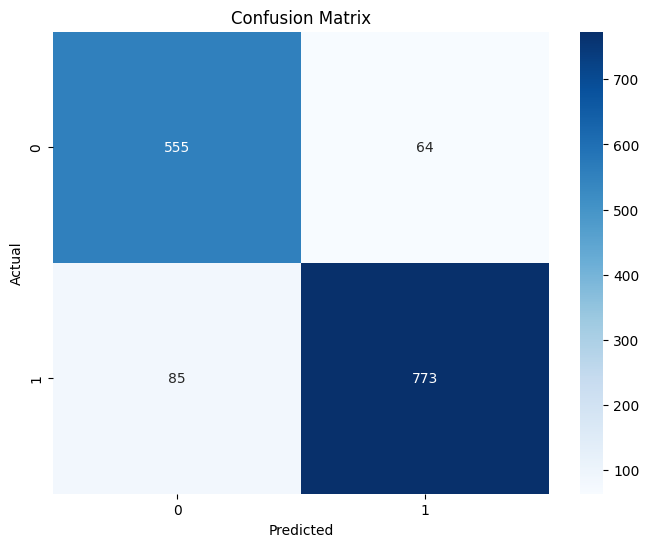

In [ ]:
# Confusion matrix
confusion_matrix_perceptron = perceptron_model.confusion_matrix(x_test_np, y_test_np)

# Ploting the confusion matrix
labels = ['0', '1']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_perceptron, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Predicting "best" car models

We'll select the best car models based on the number of times they pass the emission test, i.e their 1 frequency in test.

In [ ]:
X_np = X.to_numpy()
predictions = [perceptron_model.predict(sample) for sample in X_np]

df_with_predictions = df_original.copy() #Note:the data is not normalizd here
df_with_predictions['Predictions'] = predictions

# Group by car model and count the number of predicted 1s for each model
model_counts = df_with_predictions.groupby('Model')['Predictions'].sum().reset_index()

# Sort models based on the number of predicted 1s in descending order
sorted_models = model_counts.sort_values(by='Predictions', ascending=False)

# Display the top-ranked car models
top_n_models = 10
print(f"Top {top_n_models} Car Models with Maximum Predicted 1s:")
print(sorted_models.head(top_n_models))

Top 10 Car Models with Maximum Predicted 1s:
          Model  Predictions
907   FOCUS FFV           24
1676    SONIC 5           20
1675      SONIC           20
1086      JETTA           19
521     COMPASS           19
551     COROLLA           18
915     FORTE 5           18
360         ATS           17
1363    PATRIOT           17
263      ACCORD           17


These are the consistently best car models

# ***3.Fischer's Linear Discrimant Analysis***



## Theoritical Explanation

Fisher's Linear Discriminant Analysis (LDA) is a dimensionality reduction technique that seeks to find the linear combination of features that best separates two or more classes.
he goal is to maximize the distance between the means of different classes while minimizing the spread (variance) within each class.

$$
\operatorname{Maximize} J(W)=\frac{\operatorname{det}\left(W^T S_B W\right)}{\operatorname{det}\left(W^T S_W W\right)}
$$

The solution is obtained by solving the generalized eigenvalue problem:

$$
S_B v=\lambda S_W v
$$

Within Class Matrix
$$
S_W=\sum_{i=1}^C \sum_{j=1}^{n_i}\left(x_{i j}-m_i\right) \cdot\left(x_{i j}-m_i\right)^T
$$

Between-class Scatter Matrix:
$$
S_B=\sum_{i=1}^C N_i \cdot\left(m_i-m\right)^T \cdot\left(m_i-m\right)
$$


## Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

class FisherLinearDiscriminant:
    def __init__(self):
        self.w = None  # Weight vector
        self.b = None  # Bias term

    def calc_threshold(self, m0, m1, pi1, pi2, sw_0, sw_1):
        # Function to calculate the threshold for Fisher's Linear Discriminant
        x = sp.Symbol('x')

        # Calculate the inverse of the sum of within-class scatter matrices
        sw_inv = np.linalg.inv(sw_0 + sw_1)

        # Calculate the difference in means between the two classes
        diff_means = m1 - m0

        # Calculate the optimal weight vector
        w = np.dot(sw_inv, diff_means)

        # Calculate the threshold based on the means and weight vector
        thr = 0.5 * np.dot((m0 + m1), w)
        return thr

    def fishers(self, X, Y, x_train, y_train, x_test, y_test):
        # Function to perform Fisher's Linear Discriminant
        self.unique_classes = np.unique(y_train)

        # Separate data into two classes
        X = X.values
        X_0 = x_train[y_train == 0]
        X_1 = x_train[y_train == 1]

        # Calculate class means
        mean_0 = np.mean(x_train[y_train == 0], axis=0)
        mean_1 = np.mean(x_train[y_train == 1], axis=0)

        # Calculate class scatter matrices
        Sw_0 = np.dot((x_train[y_train == 0] - mean_0).T, x_train[y_train == 0] - mean_0)
        Sw_1 = np.dot((x_train[y_train == 1] - mean_1).T, x_train[y_train == 1] - mean_1)

        # Calculate within-class scatter matrix
        Sw = Sw_0 + Sw_1

        # Calculate optimal weight vector
        self.w = np.dot(np.linalg.inv(Sw), (mean_1 - mean_0))
        pi0 = X_0.shape[0] / (X_0.shape[0] + X_1.shape[0])
        pi1 = 1 - pi0

        # Calculate bias term
        self.b = self.calc_threshold(mean_0, mean_1, pi1, pi0, Sw_0, Sw_1)

        # Make predictions on the test set
        result = self.predict(self.w, x_test, self.b)

        # Calculate accuracy
        accuracy = self.check_accuracy(result, y_test)
        return accuracy

    def predict(self, w, x_test, thr):
        # Function to make predictions using the Fisher's Linear Discriminant model
        y = np.dot(x_test, w)
        result = (y >= thr).astype(int)
        return result

    def check_accuracy(self, result, y_test):
        # Function to calculate accuracy
        accuracy = np.mean(result == y_test) * 100
        return accuracy

    def confusionMatrix(self, X_test, y_test):
        # Get predictions using the predict method
        y_pred = self.predict(self.w, x_test, self.b)

        # Create a confusion matrix
        num_classes = len(self.unique_classes)
        confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

        # Populate the confusion matrix
        for actual, predicted in zip(y_test, y_pred):
            actual_idx = np.where(self.unique_classes == actual)[0][0]
            predicted_idx = np.where(self.unique_classes == predicted)[0][0]
            confusion_matrix[actual_idx, predicted_idx] += 1

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=self.unique_classes, yticklabels=self.unique_classes)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    def plot_predicted_vs_input(self, x_test, x_dimension_to_plot):
        # Make predictions
        y = self.predict(self.w, np.array(x_test), self.b)  # Convert x_test to a NumPy array

        # Map numerical labels to "Safe" and "Unsafe"
        labels = {0: "Unsafe", 1: "Safe"}
        y_labels = np.vectorize(labels.get)(y)

        # Define colors for "Safe" and "Unsafe"
        colors = {0: "red", 1: "blue"}
        y_colors = np.vectorize(colors.get)(y)

        # Plot the data with labels and specified colors
        n = x_dimension_to_plot
        column_heading = x_test.columns[n]

        plt.scatter(np.array(x_test)[:, x_dimension_to_plot], y, c=y_colors, cmap='viridis')  # Convert x_test to a NumPy array
        plt.xlabel(column_heading)
        plt.ylabel('Prediction')
        plt.title('Vehicle Safety Prediction')
        plt.yticks([0, 1], labels.values())  # Set y-axis ticks to "Unsafe" and "Safe"
        plt.show()





## Analysis

In [ ]:
fischer_model = FisherLinearDiscriminant()
accuracy = fischer_model.fishers(X,Y,x_train, y_train, x_test, y_test)
print(f"Accuracy: {accuracy}%")

Accuracy: 90.18280297901151%


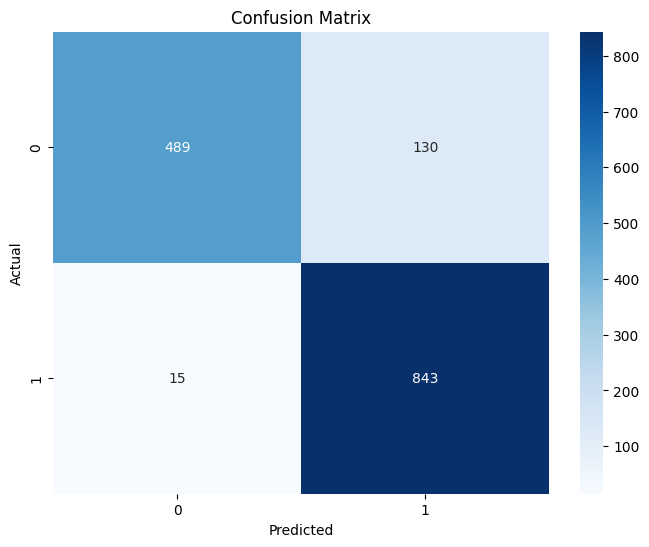

In [ ]:
confusion_matrix_fischer = fischer_model.confusionMatrix(x_test, y_test)

Scatter matrix of Y vs attribute number 1


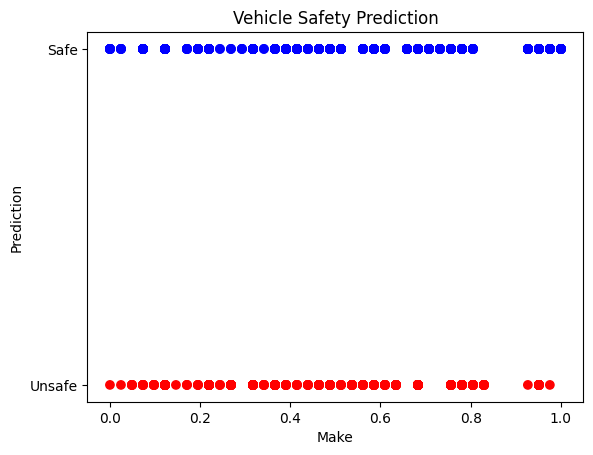


Scatter matrix of Y vs attribute number 2


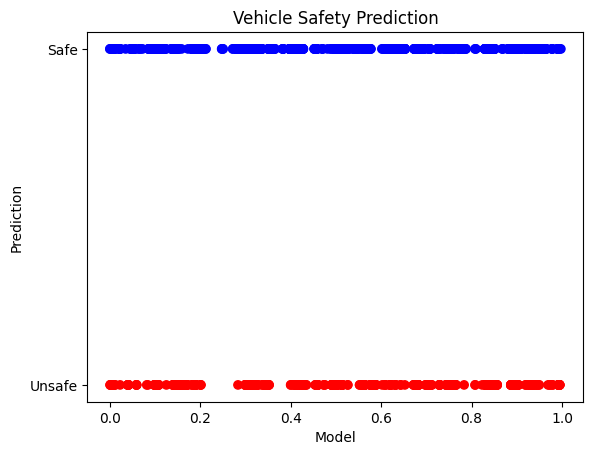


Scatter matrix of Y vs attribute number 3


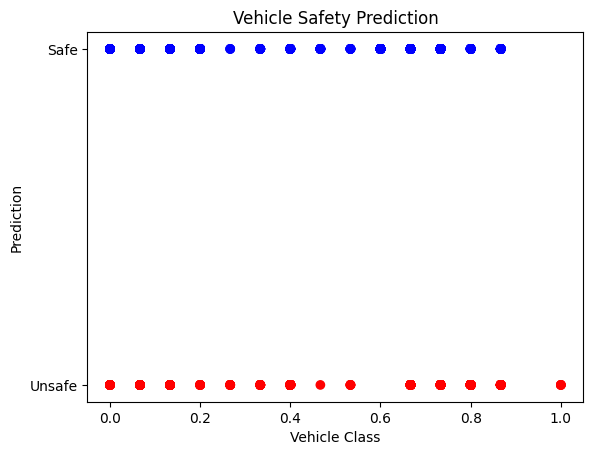


Scatter matrix of Y vs attribute number 4


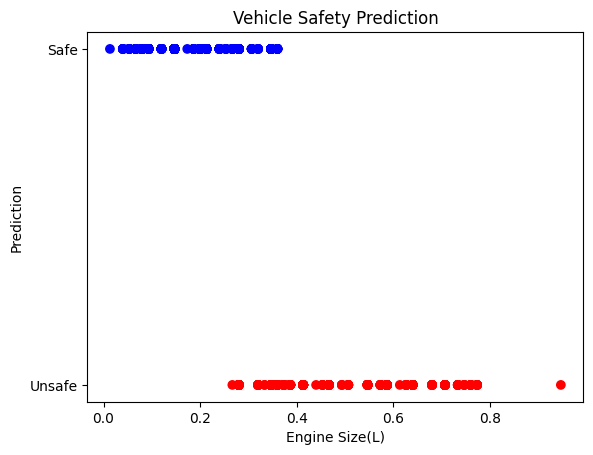


Scatter matrix of Y vs attribute number 5


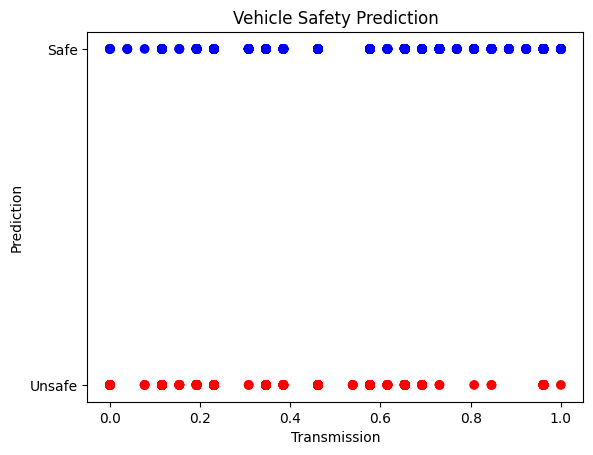


Scatter matrix of Y vs attribute number 6


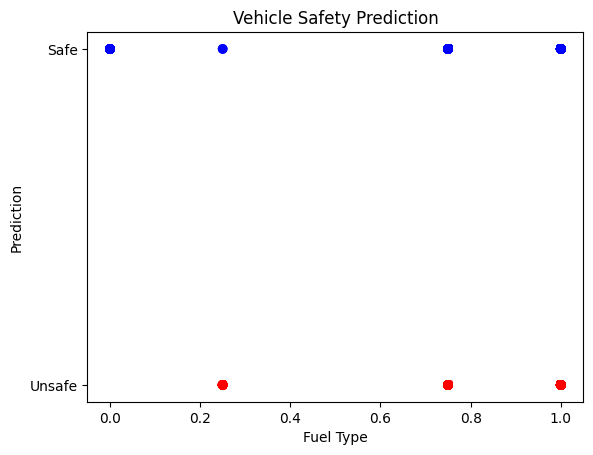


Scatter matrix of Y vs attribute number 7


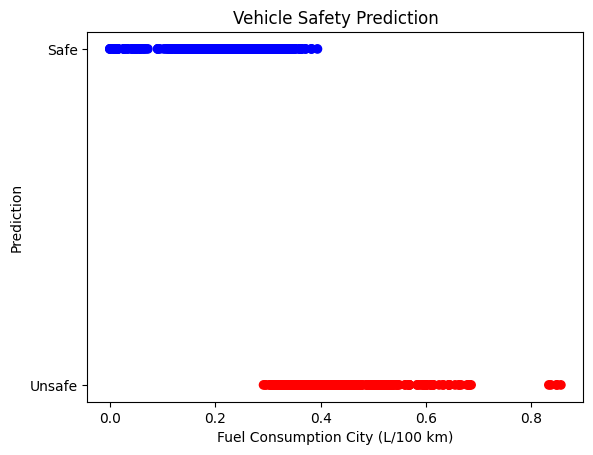

In [ ]:
for n in range(x_test.shape[1]):
    print(f"Scatter matrix of Y vs attribute number {n+1}")
    fischer_model.plot_predicted_vs_input(x_test, x_dimension_to_plot=n)
    print()  # Add an empty line after each iteration


## Predicting "best" car models

We merge the predicted outcome column to our dataset.

In [ ]:
# Predictions on the full dataset
predictions = fischer_model.predict(fischer_model.w, X, fischer_model.b)

# Combine predictions with the dataset
df_with_predictions = df_original.copy()
df_with_predictions['Predictions'] = predictions

# Group by car model and count the number of predicted 1s for each model
model_counts = df_with_predictions.groupby('Model')['Predictions'].sum().reset_index()

# Sort models based on the number of predicted 1s in descending order
sorted_models = model_counts.sort_values(by='Predictions', ascending=False)

# Display the top-ranked car models
top_n_models = 10
print(f"Top {top_n_models} Car Models with Maximum Predicted 1s:")
print(sorted_models.head(top_n_models))

Top 10 Car Models with Maximum Predicted 1s:
          Model  Predictions
907   FOCUS FFV           24
1676    SONIC 5           20
1675      SONIC           20
360         ATS           19
263      ACCORD           19
521     COMPASS           19
1086      JETTA           19
915     FORTE 5           18
551     COROLLA           18
1363    PATRIOT           17


# ***4. Naive Bayes***

## Theoritical Explanation

Naive Bayes assumes that the features are conditionally independent given the class label. This assumption simplifies the likelihood term:

$$
\hat y = \text{arg max}_y P(y|X)
$$

$$
P\left(x_i \mid y\right)=\frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(-\frac{\left(x_i-\mu_y\right)^2}{2 \sigma_y^2}\right)
$$

$$
P(y) = \frac{\text{No. of instances of class y}} {\text{Total No. of instances}}
$$

## Code

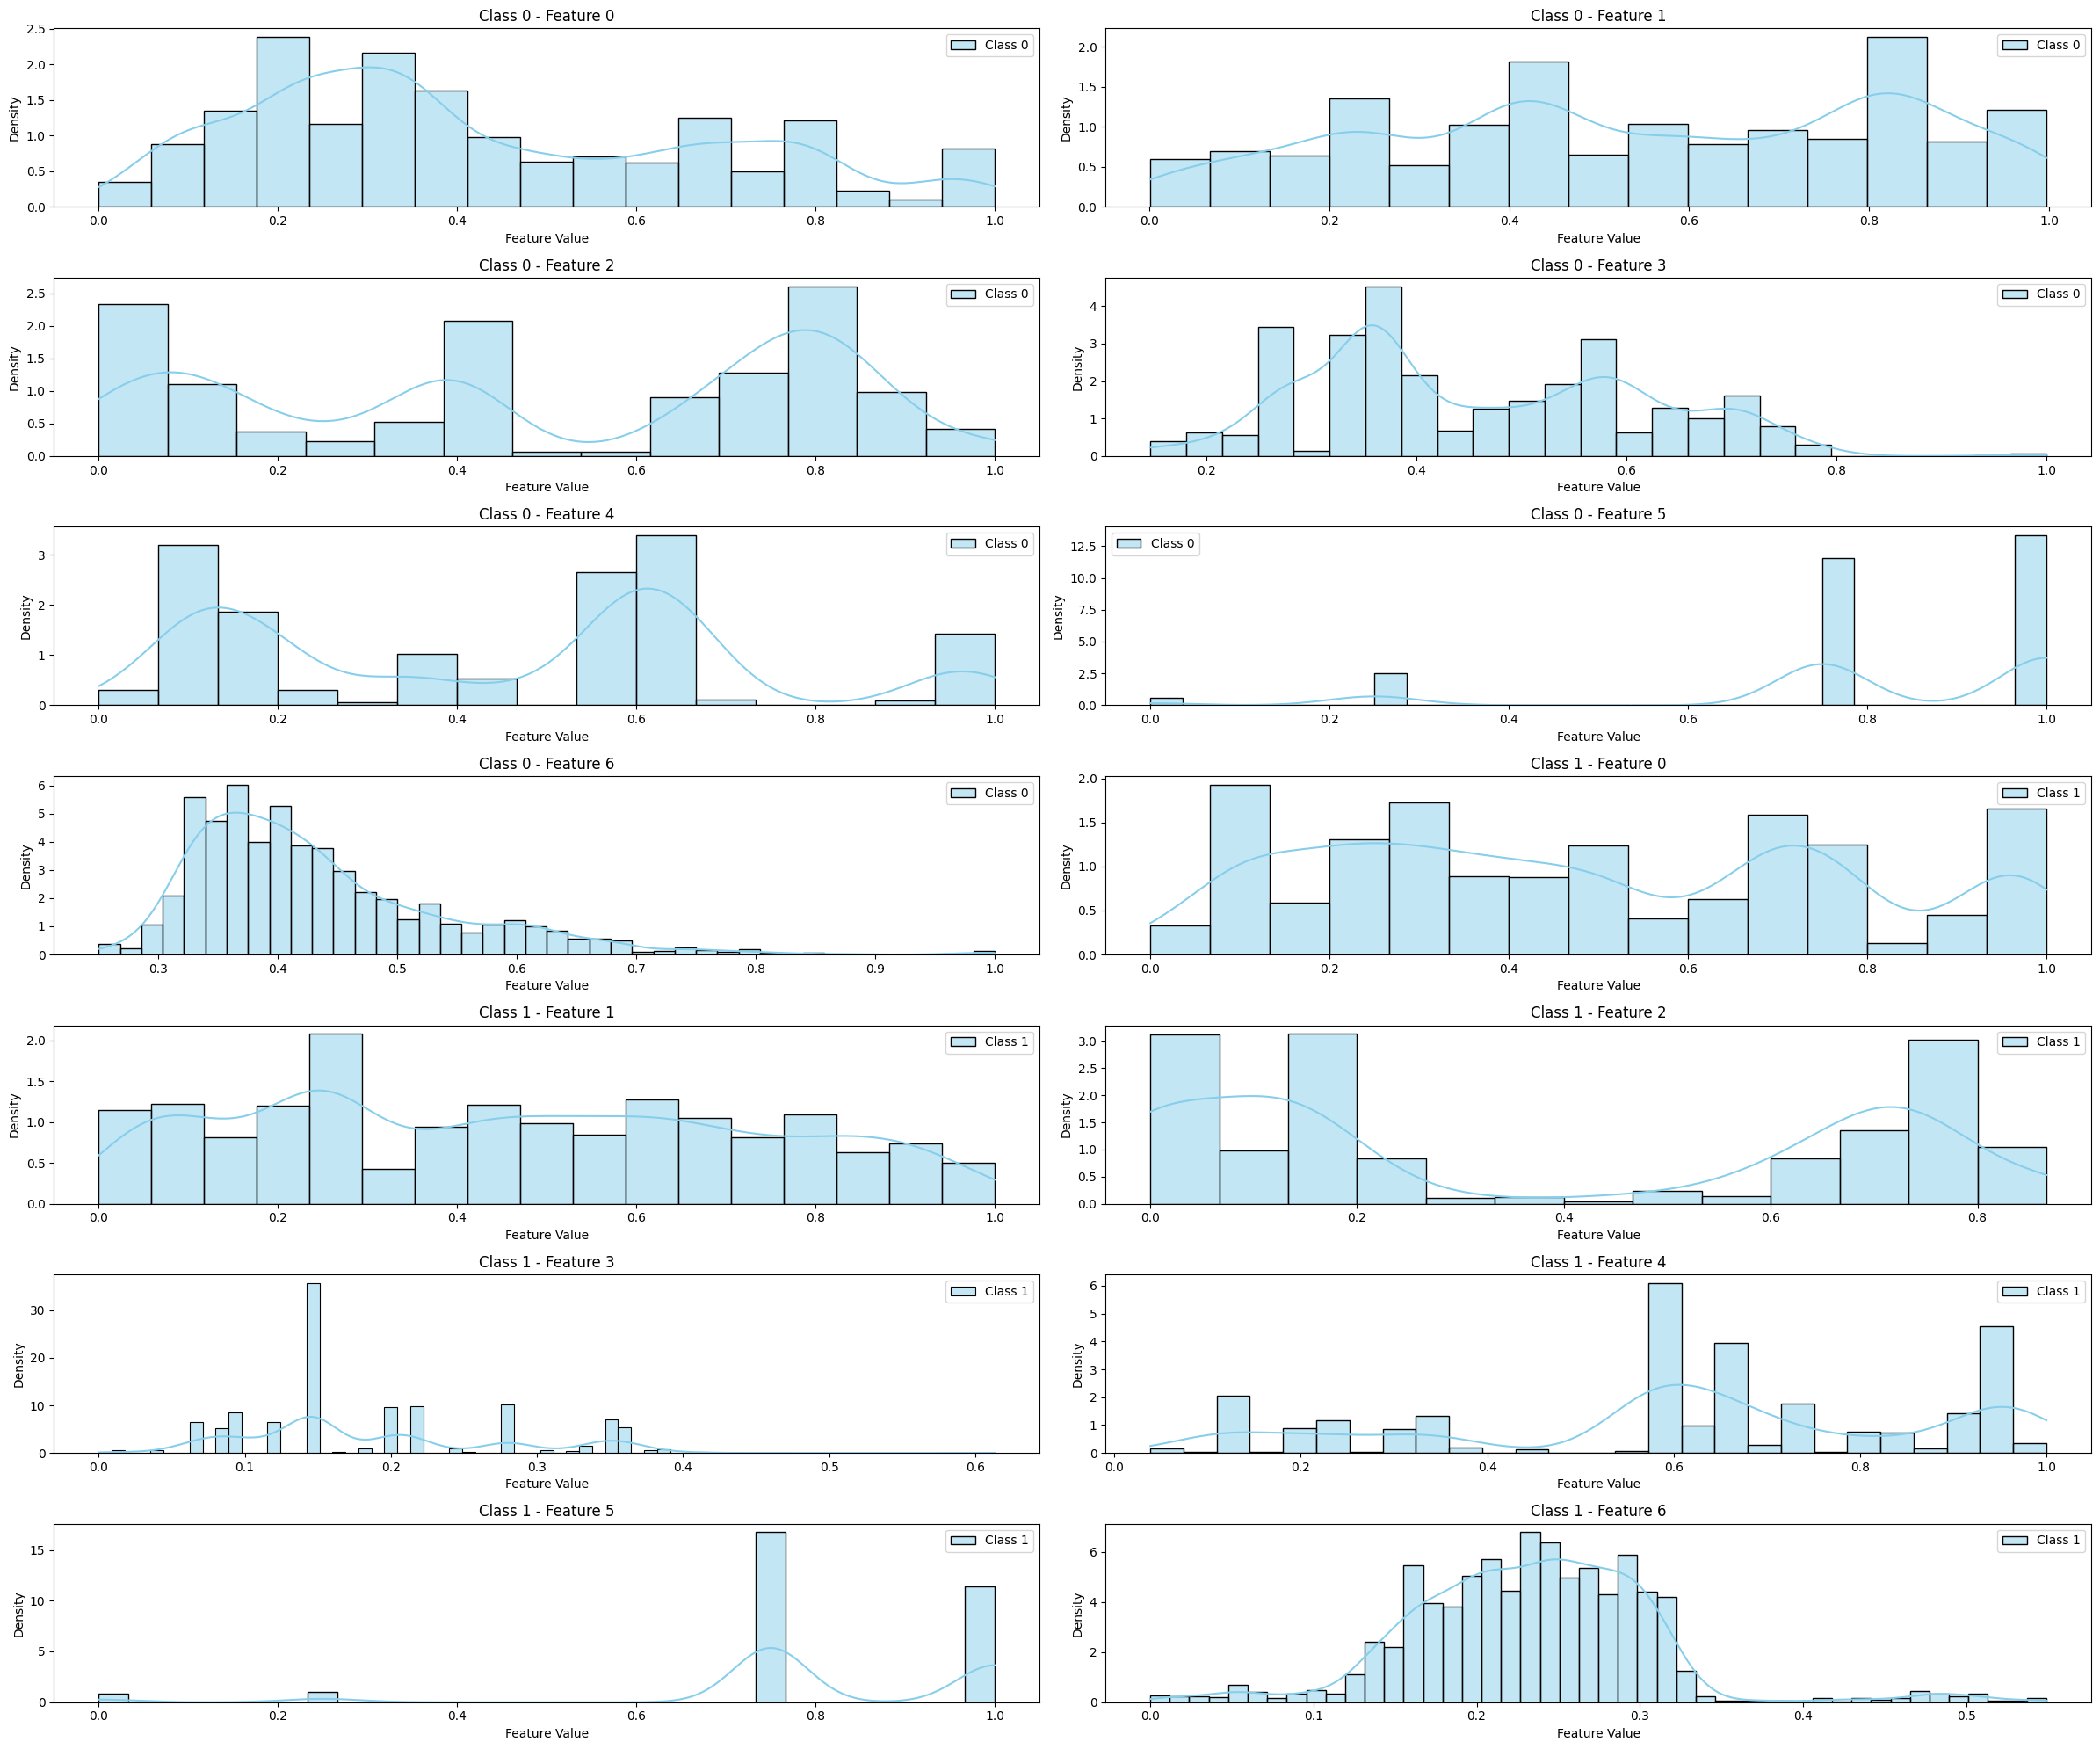

In [ ]:
# Visualize the class probability distribution for each class. This can be done by plotting the estimated probability densities for each class.
def class_probability_distribution(X, y, num_feature):
    unique_classes = np.unique(y)

    plt.figure(figsize=(24,20))

    for class_label in unique_classes:
        class_features = X[y == class_label]

        for feature_idx in range(num_feature):
            plt.subplot(num_feature, len(unique_classes), class_label * num_feature + feature_idx + 1)
            sns.histplot(class_features[:, feature_idx], kde=True, label=f'Class {class_label}', color='skyblue', stat='density')

            plt.title(f'Class {class_label} - Feature {feature_idx}')
            plt.xlabel('Feature Value')
            plt.ylabel('Density')
            plt.legend()

    plt.tight_layout()
    plt.show()

class_probability_distribution(x_train.to_numpy(), y_train, num_feature=x_train.shape[1])


In [ ]:
class GNaiveBayesClassifier:

    def priorProb(self, X, y):          #calculating the prior probablity of all the features
      # self is a reference to the instance of a class. It is used to access the attributes and methods of the class.

        grouped_data = X.groupby(y).apply(lambda x: len(x))
        # Calculate the prior probability by dividing the length of each group by the total number of rows
        prior_prob = grouped_data / self.num_rows
        # Convert the prior probability to a numpy array
        self.prior = prior_prob.to_numpy()
        return self.prior

    def stat_Paramteres(self, X, y):        #calculating mean and var of each class so that later we can use this for likeihood function

        #  Group the data by y and calculate the mean of each group
        grouped_mean = X.groupby(y).apply(np.mean)
        #  Convert the grouped mean to a numpy array
        self.mean = grouped_mean.to_numpy()
        #  Group the data by y and calculate the variance of each group
        grouped_var = X.groupby(y).apply(np.var)
        #  Convert the grouped variance to a numpy array
        self.var = grouped_var.to_numpy()
        #  Return the mean and variance
        return self.mean, self.var

    def dens_Gauss(self, class_i, x):           #calculating  probablity mass function  which is our likelihood function for Naive Bayes

        #  Retrieve the mean and variance of the specified class
        mean = self.mean[class_i]
        var = self.var[class_i]
        #  Calculate the probability mass function (PMF) using the mean, variance, and input value x
        pmf = np.exp((-1/2)*((x-mean)**2) / (2 * var)) / np.sqrt(2 * np.pi * var)

        return pmf

    def post_Prob(self, x):                       #calculating probablity for each class

        posteriors = []

                                                                        #computes the posterior probability for each class based on the prior probability and the conditional probability of the features.
        for i in range(self.count_unique_classes):

            prior = np.log(self.prior[i])
            conditional = np.sum(np.log(self.dens_Gauss(i, x)))
            posterior = prior + conditional                                 #The posterior probability for each class is obtained by adding the log prior and log conditional probability.
            posteriors.append(posterior)

        return self.unique_classes[np.argmax(posteriors)]                   #the final predicted class is the one with the highest posterior probability.

    def train(self, X, y):

        # Get unique classes and their count
        self.unique_classes = np.unique(y)
        self.count_unique_classes = len(self.unique_classes)
        # Get number of features and rows
        self.num_feature = X.shape[1]
        self.num_rows = X.shape[0]
        # Calculate statistical parameters
        self.stat_Paramteres(X, y)
        # Calculate prior probabilities
        self.priorProb(X, y)

    def predict(self, X):
        # preds = [self.post_Prob(f) for f in X.to_numpy()]
        preds = []
        for f in X.to_numpy():
          # For each row, call the post_Prob function with the current row as an argument.
          # Append the result of post_Prob to the preds list.
          preds.append(self.post_Prob(f))
        return preds

    def accuracy(self, y_test, y_pred):
        # accuracy = np.sum(y_test == y_pred) / len(y_test)
        # Calculate the number of correct predictions by comparing y_test and y_pred using the == operator.
        correct_predictions = np.sum(y_test == y_pred)
        total_predictions = len(y_test)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def confusionMatrix(self, X_test, y_test):
        # Get predictions using the predict method
        y_pred = self.predict(X_test)

        # Create a confusion matrix
        num_classes = len(self.unique_classes)
        confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

        # Populate the confusion matrix
        for actual, predicted in zip(y_test, y_pred):
            actual_idx = np.where(self.unique_classes == actual)[0][0]
            predicted_idx = np.where(self.unique_classes == predicted)[0][0]
            confusion_matrix[actual_idx, predicted_idx] += 1

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=self.unique_classes, yticklabels=self.unique_classes)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()


        return confusion_matrix

## Analysis

In [ ]:
naive_bayes_model = GNaiveBayesClassifier()
naive_bayes_model.train(x_train, y_train)

predicted = naive_bayes_model.predict(x_test)
accuracy = naive_bayes_model.accuracy(y_test, predicted)*100
print(f"Accuracy: {accuracy}%")

Accuracy: 85.17264725795532%


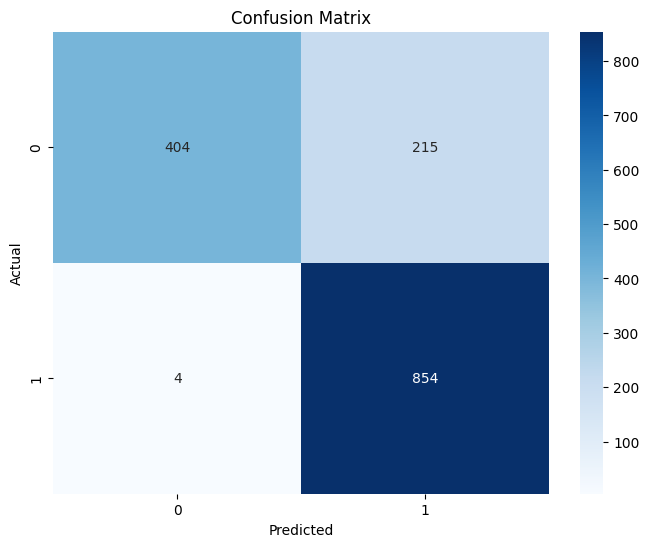

In [ ]:
confusion_matrix_naive_bayes = naive_bayes_model.confusionMatrix(x_test, y_test)

## Predicting "best" car models

In [ ]:
X_np = pd.DataFrame(X)

# Make predictions using the trained perceptron model
predictions = naive_bayes_model.predict(X_np)

# Combine predictions with the dataset
df_with_predictions = df_original.copy() #Note:the data is not normalizd here
df_with_predictions['Predictions'] = predictions

# Group by car model and count the number of predicted 1s for each model
model_counts = df_with_predictions.groupby('Model')['Predictions'].sum().reset_index()

# Sort models based on the number of predicted 1s in descending order
sorted_models = model_counts.sort_values(by='Predictions', ascending=False)

# Display the top-ranked car models
top_n_models = 10
print(f"Top {top_n_models} Car Models with Maximum Predicted 1s:")
print(sorted_models.head(top_n_models))

Top 10 Car Models with Maximum Predicted 1s:
          Model  Predictions
907   FOCUS FFV           24
1675      SONIC           20
1676    SONIC 5           20
360         ATS           19
1086      JETTA           19
521     COMPASS           19
263      ACCORD           19
551     COROLLA           18
915     FORTE 5           18
1363    PATRIOT           17


# ***5. ML Model 4 (Based on research literature)***

# ***6. Comparison of insights drawn from the models***

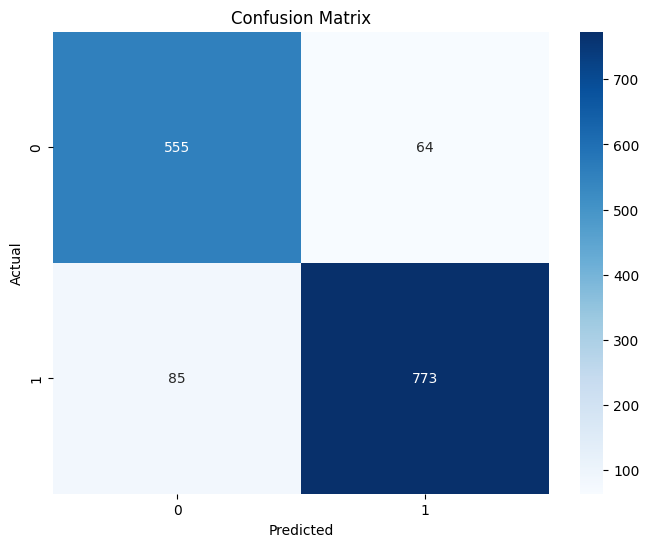

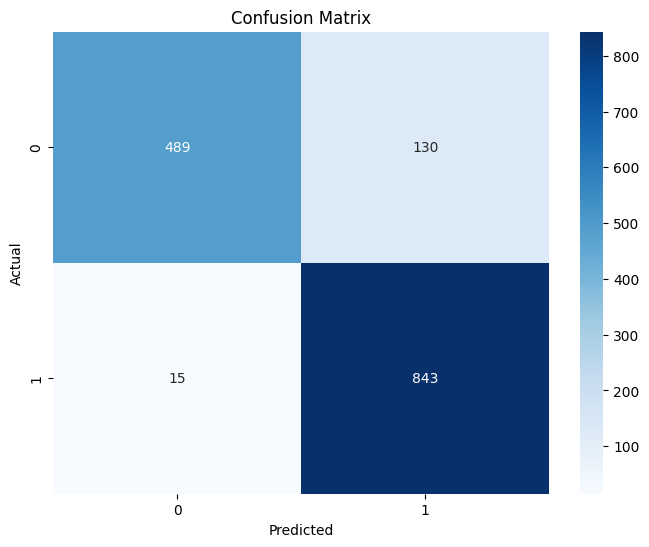

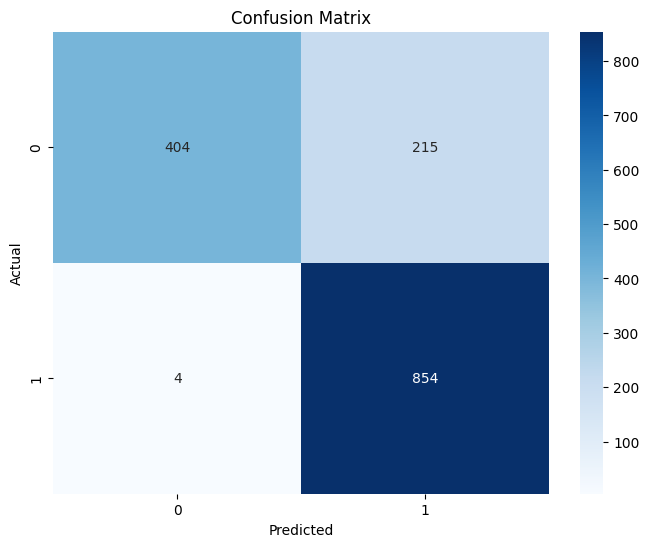

In [ ]:
# Confusion matrix
confusion_matrix_perceptron = perceptron_model.confusion_matrix(x_test_np, y_test_np)

# Ploting the confusion matrix
labels = ['0', '1']
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_perceptron, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Perceptron Confusion Matrix ')
plt.show()

confusion_matrix_fischer = fischer_model.confusionMatrix(x_test, y_test)
confusion_matrix_naive_bayes = naive_bayes_model.confusionMatrix(x_test, y_test)

 FOCUS FFV           24
1    SONIC 5           20
1      SONIC           20
10     JETTA           19
5    COMPASS           19
     COROLLA           18
     FORTE 5           18
         ATS           17
    PATRIOT           17
     ACCORD           17

# **_7. References_**





**1. Naive Bayes Classifier**

Class Notes

[Towards Data Science](https://towardsdatascience.com/the-naive-bayes-classifier-how-it-works-e229e7970b84#:~:text=The%20Naive%20Bayes%20algorithm%20is%20explained%20through%20simple%20examples.&text=Introduction%3A,%2Fmedium%2Fhigh%2C%20etc.)

[Andrew NG Playlist](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)

---

**2. Perceptron**

Class Notes

Andrew NG Notes

[Analytics-Vidhya](https://medium.com/analytics-vidhya/the-perceptron-algorithm-for-binary-classification-ab65aaf237d7)

[AssemblyAI](https://www.youtube.com/watch?v=aOEoxyA4uXU)

---

**3. Fischer Discriminant Analysis**




Class Notes

[Andrew NG Playlist](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)

[Stack Exchange](https://stats.stackexchange.com/questions/4942/threshold-for-fisher-linear-classifier
)

[PlainEnglish](https://ai.plainenglish.io/fischers-linear-discriminant-analysis-in-python-from-scratch-bbe480497504
)

---

**4. XGBoost**


Class Notes

[Andrew NG Playlist](https://www.youtube.com/playlist?list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU)

[Original Reference Paper](https://arxiv.org/abs/1603.02754)

[kdnuggets](https://www.kdnuggets.com/2018/08/unveiling-mathematics-behind-xgboost.html
)

---